# Online Payments Fraud Detection (BB PLC Case Study) 

Blosssom Bank ( BB PLC) is a multinational finbancial services group, that offers retail and investment banking, pension management, assets management and payment services, headquartered in London, UK.

Blossom Bank wants to build a machine learning model to predict online payment fraud.

This is 'Binary Classification' task and the algorithms employed will be supervised learning algorithms. The dataset used for this task is: https://drive.google.com/file/d/1ZIjmAjPccvy16mOk7nrPtWe-_3rRP5zy/view?usp=sharing

With this model, BB PLC will:
1. Keep up with fast evolving technological threats and better prevent the loss of funds (profit) to fraudsters. 
2. Accurately detect and identify anomalies in managing online transactions done on its platforms which may go undetected using traditional rules-based methods.
3. Improve quality assurance thus retaining old customers and acquire new ones. This will increase credit/profit base.
4. Improve its policy and decision making.

In [1]:
#import the libaries to work with for EDA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
#loading the data set
data = pd.read_csv('Online Payment Fraud Detection.csv',encoding='unicode-escape')

# Understanding the Data

In [7]:
# Checking the size of the dataset (Rows,Columns)
data.shape

(1048575, 10)

In [9]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [10]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


Dataset contains transactions that happened within 3days:20hours

In [11]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [12]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [14]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [15]:
#check for missing Data using isna().sum()

data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

No Missing Data

## Relationships and Insights

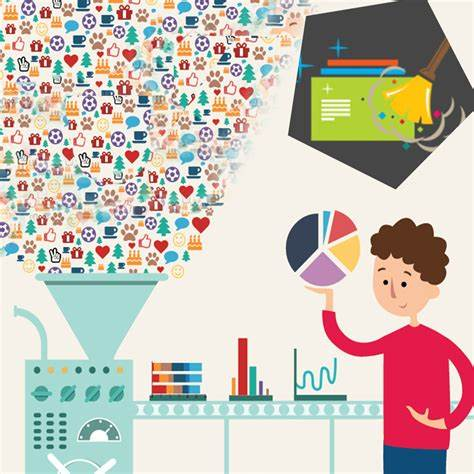

Exploring Relationships and insights in the dataset to answer unique business questions and gain more insights

In [16]:
#Checking which recipients stand out

data.nameDest.unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'M1355182933',
       'M1964992463', 'M677577406'], dtype=object)

In [17]:
#Investigating to check unique customers
data.nameOrig.unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C2037964975',
       'C1633237354', 'C1264356443'], dtype=object)

In [18]:
#investigating to see how many times a customer started a transaction
data.nameOrig.value_counts()

C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
              ..
C560131732     1
C455251560     1
C650578540     1
C1883668225    1
C1264356443    1
Name: nameOrig, Length: 1048317, dtype: int64

In [19]:
#How many times a recipient got a transaction
data.nameDest.value_counts()

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: nameDest, Length: 449635, dtype: int64

In [20]:
data.amount.max()

10000000.0

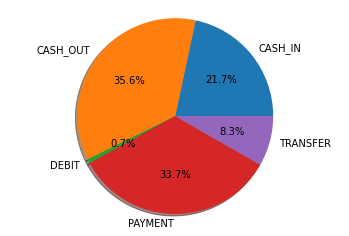

In [21]:
#Checking the distribution of the type of transactions made

labels = data['type'].astype('category').cat.categories.tolist()
counts = data['type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [22]:
#Investigating how many times a particular type of transaction was carried out. 

data.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [23]:
#Investigating the top customers and the type of transactions they initiated
top_ten = data.groupby('nameOrig').type.sum().sort_values(ascending=False)[:10]
top_ten

nameOrig
C24957224      TRANSFERTRANSFER
C1378765159    TRANSFERTRANSFER
C813633808     TRANSFERTRANSFER
C940075559     TRANSFERTRANSFER
C1709295811     TRANSFERPAYMENT
C196315367      TRANSFERPAYMENT
C1077087409     TRANSFERPAYMENT
C495164373      TRANSFERPAYMENT
C192628069      TRANSFERPAYMENT
C1039623203     TRANSFERPAYMENT
Name: type, dtype: object

In [24]:
#Checking the average amounttransacted
data['amount'].mean()

158666.9755271443

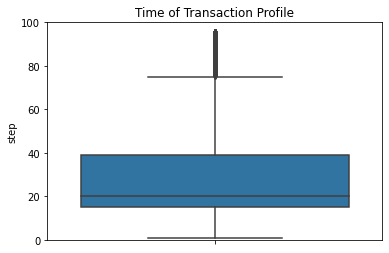

In [25]:
sns.boxplot(y=data.step)
plt.title('Time of Transaction Profile')
plt.ylim(0,100)
plt.show()

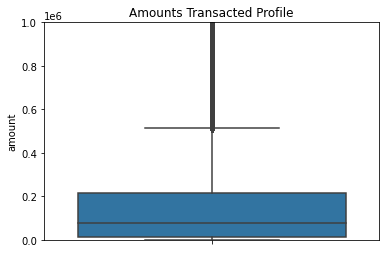

In [26]:
sns.boxplot(y=data.amount)
plt.title('Amounts Transacted Profile')
plt.ylim(0,1000000)
plt.show()

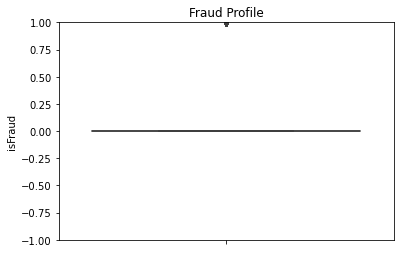

In [27]:
sns.boxplot(y=data.isFraud)
plt.title('Fraud Profile')
plt.ylim(-1,1)
plt.show()

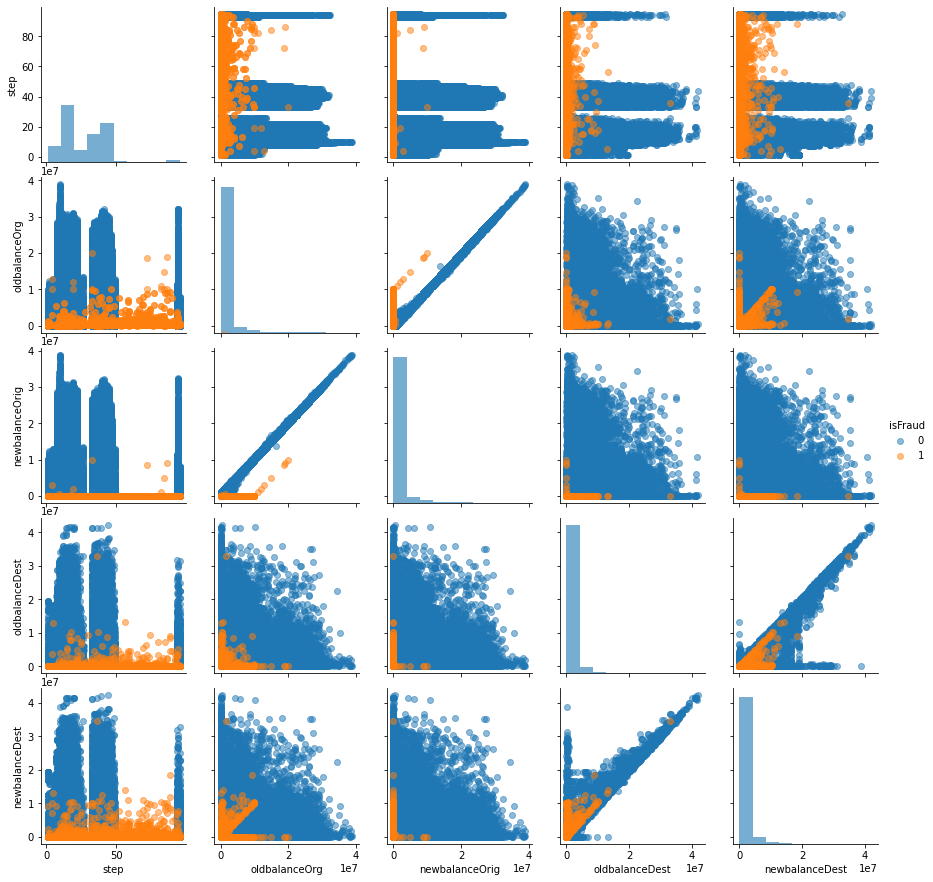

In [23]:
#Visualising the spread of fraud variables across the dataset

Online_Payment_layout = sns.PairGrid(data, vars = ['step', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], hue = 'isFraud')

Online_Payment_layout.map_diag(plt.hist, alpha = 0.6)
Online_Payment_layout.map_offdiag(plt.scatter, alpha = 0.5)
Online_Payment_layout.add_legend()

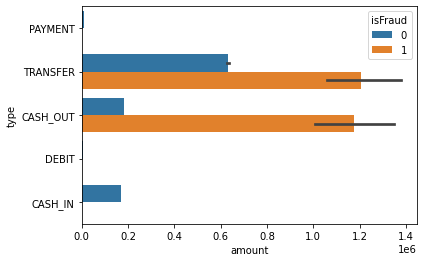

In [30]:
sns.barplot(x='amount', y='type', hue= 'isFraud', data=data)
plt.show()

(0.0, 2000000.0)

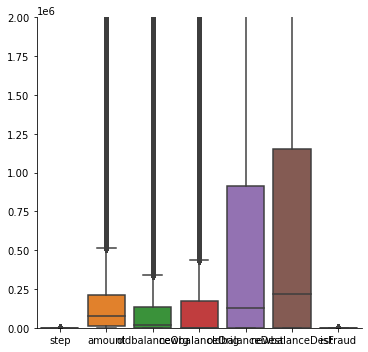

In [26]:

sns.catplot(data=data,kind='box')

plt.ylim(0,2000000)

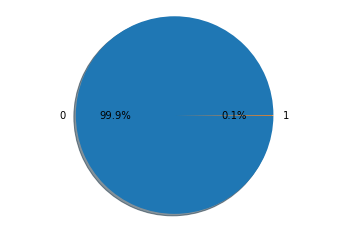

In [31]:
# Fraud Distribution

labels = data['isFraud'].astype('category').cat.categories.tolist()
counts = data['isFraud'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [32]:
# Sepearating Fraudulent transaction from non fraudulent

Fraudulent_Transaction = data[data.isFraud ==1]
Not_Fraudulent_Transaction = data[data.isFraud ==0]

In [33]:
print('Fraudulent Transaction: {}'.format(len(Fraudulent_Transaction)))
print('Not Fraudulent Transaction: {}'.format(len(Not_Fraudulent_Transaction)))
   

Fraudulent Transaction: 1142
Not Fraudulent Transaction: 1047433


The dataset shows heavy 'Class-imbalance'

In [34]:
#Understanding The statistical nature of Non Fraudulent Transactions.

Not_Fraudulent_Transaction.amount.describe()

count    1.047433e+06
mean     1.575397e+05
std      2.541883e+05
min      1.000000e-01
25%      1.213487e+04
50%      7.621497e+04
75%      2.134928e+05
max      6.419835e+06
Name: amount, dtype: float64

In [35]:
#Understanding The statistical nature of Fraudulent Transactions.

Fraudulent_Transaction.amount.describe()

count    1.142000e+03
mean     1.192629e+06
std      2.030599e+06
min      1.190000e+02
25%      8.607017e+04
50%      3.531794e+05
75%      1.248759e+06
max      1.000000e+07
Name: amount, dtype: float64

In [36]:
#Comparing both class of transactions
data.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,,
0,26.942944,1.575397e+05,8.736338e+05,894746.395080,978732.769117,1.114237e+06
1,48.272329,1.192629e+06,1.218636e+06,33944.321208,452866.124527,1.077940e+06


# Undersampling
 

Building a sample dataset containing similar distribution of Non Fraudulent transactions and Fraudulent transactions. This rectifies the class-imbalance and helps our machine learning model to perform better predictions.

Since we want to build a model that detects Fraud, we base our sampling on the number of transactions classed as fraudulent in our original dataset.

Fraudulent transactions: 1142

In [37]:
Non_Fraudulent_Sample = Not_Fraudulent_Transaction.sample(n=1142)

Joining the two dataframes

In [38]:
new_dataset = pd.concat([Non_Fraudulent_Sample, Fraudulent_Transaction], axis=0)

In [39]:
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
857583,41,PAYMENT,1489.61,C1323018578,0.00,0.00,M456542674,0.00,0.0,0
360675,17,CASH_OUT,15255.92,C509121857,241.00,0.00,C1589513081,30704.00,0.0,0
132953,11,CASH_IN,370169.14,C735360669,73288.00,443457.14,C2082628894,22499.16,0.0,0
15801,8,PAYMENT,1739.11,C2075982863,21627.91,19888.80,M386886002,0.00,0.0,0
208271,13,PAYMENT,19257.38,C820056795,10544.00,0.00,M883356904,0.00,0.0,0


In [40]:
new_dataset.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1047888,95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1
1048221,95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1
1048222,95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1
1048323,95,TRANSFER,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,1
1048324,95,CASH_OUT,87999.25,C409531429,87999.25,0.0,C1827219533,0.00,87999.25,1


In [41]:
new_dataset['isFraud'].value_counts()

0    1142
1    1142
Name: isFraud, dtype: int64

In [42]:
new_dataset.shape

(2284, 10)

In [43]:
#Checking to see if the new dataset we obtained is a good i.e does not deviate significantly from our original dataset
new_dataset.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,,
0,26.809982,1.569710e+05,8.158155e+05,836623.268669,981000.972250,1.137731e+06
1,48.272329,1.192629e+06,1.218636e+06,33944.321208,452866.124527,1.077940e+06


New dataset obtained is good and class-imbalance rectified.

Now, the data can be split for feature selection, targeting and training.

# Feature Engineering

To train and test our machine learning model, we select features (columns) from our dataset  
Because our dataset contains categorial values ('nameOrig', 'nameDest'). it becomes necessary to convert them into binary format which can be readily used by or Machine learning model.

This is done through one-hot encoding.

In [44]:
# One-hot Encoding.
#Importing library

from sklearn.preprocessing import OneHotEncoder

In [45]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop=None,)

In [46]:
#perform one-hot encoding on 'type' column 
encoder_df =  pd.get_dummies(new_dataset, columns=['type','nameOrig','nameDest'], prefix=['type','nameOrig','nameDest'])

In [74]:
encoder_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M960924850,nameDest_M96128114,nameDest_M961359522,nameDest_M970203394,nameDest_M972843705,nameDest_M98123791,nameDest_M984643198,nameDest_M991235422,nameDest_M991949708,nameDest_M994830561
640977,35,3859.10,69465.00,65605.90,0.00,3859.10,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
249500,14,200044.80,221859.00,21814.20,0.00,200044.80,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
668387,36,113116.79,5909423.99,6022540.77,767687.78,654571.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
799459,40,166238.44,3413140.29,3579378.73,984579.53,818341.10,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
47849,9,117097.71,17895.00,0.00,25844.00,0.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047888,95,56745.14,56745.14,0.00,51433.88,108179.02,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1048221,95,33676.59,33676.59,0.00,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048222,95,33676.59,33676.59,0.00,0.00,33676.59,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1048323,95,87999.25,87999.25,0.00,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
encoder_df.shape

(2284, 4559)

In [48]:
# Check result of one-hot encoding
encoder_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M937351412,nameDest_M941819956,nameDest_M944740216,nameDest_M955685432,nameDest_M960127682,nameDest_M960655646,nameDest_M966017907,nameDest_M973092639,nameDest_M977934010,nameDest_M979532084
857583,41,1489.61,0.00,0.00,0.00,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
360675,17,15255.92,241.00,0.00,30704.00,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
132953,11,370169.14,73288.00,443457.14,22499.16,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15801,8,1739.11,21627.91,19888.80,0.00,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208271,13,19257.38,10544.00,0.00,0.00,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
encoder_df.tail()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M937351412,nameDest_M941819956,nameDest_M944740216,nameDest_M955685432,nameDest_M960127682,nameDest_M960655646,nameDest_M966017907,nameDest_M973092639,nameDest_M977934010,nameDest_M979532084
1047888,95,56745.14,56745.14,0.0,51433.88,108179.02,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1048221,95,33676.59,33676.59,0.0,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048222,95,33676.59,33676.59,0.0,0.00,33676.59,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1048323,95,87999.25,87999.25,0.0,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048324,95,87999.25,87999.25,0.0,0.00,87999.25,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Target, Feature Split

Target Selection


'isFraud' column selected as Target (Y)

In [50]:
Y = encoder_df['isFraud']

In [51]:
features = encoder_df.drop('isFraud', axis=1)

In [52]:
X = features

In [53]:
Y.head()

857583    0
360675    0
132953    0
15801     0
208271    0
Name: isFraud, dtype: int64

In [54]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,...,nameDest_M937351412,nameDest_M941819956,nameDest_M944740216,nameDest_M955685432,nameDest_M960127682,nameDest_M960655646,nameDest_M966017907,nameDest_M973092639,nameDest_M977934010,nameDest_M979532084
857583,41,1489.61,0.00,0.00,0.00,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
360675,17,15255.92,241.00,0.00,30704.00,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
132953,11,370169.14,73288.00,443457.14,22499.16,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15801,8,1739.11,21627.91,19888.80,0.00,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
208271,13,19257.38,10544.00,0.00,0.00,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [55]:
from sklearn.model_selection import train_test_split

In [57]:
#create X_train, X_test, Y_train, Y_test
# using test_size of 20%

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)


In [58]:
print('\n',X_train.head(2))

print('\n',X_test.head(2))

print('\n',Y_train.head(2))

print('\n',Y_test.head(2))


          step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
1030484    67  106460.7      106460.70             0.0      1414263.15   
257895     14   14487.7        7038.86             0.0            0.00   

         newbalanceDest  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
1030484      1520723.84             0              1           0   
257895             0.00             0              0           0   

         type_PAYMENT  ...  nameDest_M937351412  nameDest_M941819956  \
1030484             0  ...                    0                    0   
257895              1  ...                    0                    0   

         nameDest_M944740216  nameDest_M955685432  nameDest_M960127682  \
1030484                    0                    0                    0   
257895                     0                    0                    0   

         nameDest_M960655646  nameDest_M966017907  nameDest_M973092639  \
1030484                    0                    0       

# Training our Classification Model with a Logistic Regression Classifier

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression()

In [61]:
#Training model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

In [62]:
model_pred = model.predict(X_test)

In [63]:
# Obtain model probabilities
probs = model.predict_proba(X_test)

## Logistic Regression Model Evaluation

In [64]:
#importing the methods
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_recall_curve, average_precision_score, roc_auc_score

In [65]:
print('\nClassification Report:')
print(classification_report(Y_test, model_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       229
           1       0.90      0.94      0.92       228

    accuracy                           0.92       457
   macro avg       0.92      0.92      0.92       457
weighted avg       0.92      0.92      0.92       457



In [66]:
# check True Negatives/Positives, False Negatives/Positives
pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'], 
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),205,24
Actually Positive(1),13,215


In [67]:
# Print confusion matrix using predictions in context 
pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'], 
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

,Predicted Not Fraud(0),Predicted Fraud(1)
Actually Not Fraud(0),205,24
Actually Fraud(1),13,215


In [68]:
# ACCURACY SCORE
print('Accuracy:',accuracy_score(Y_test, model_pred))

Accuracy: 0.9190371991247265


OurLogistic Regression Model indicates 93% accuracy

In [69]:
# Calculate average precision and the P-R curve
average_precision = average_precision_score(Y_test, model_pred)
average_precision

0.8767360466941045

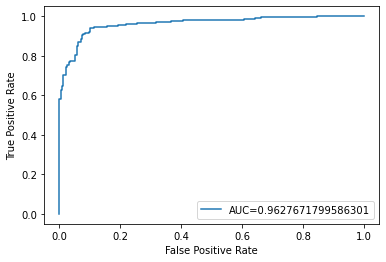

In [71]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [72]:
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:,1]))

AUC Score:
0.9627671799586301


The  ROC curve, also known as Receiver Operating Characteristics Curve, is a metric used to measure the performance of a classifier model. The ROC curve depicts the rate of true positives with respect to the rate of false positives, therefore highlighting the sensitivity of the classifier model. The higher the AUC (Area Under The Curve), the better the performance of the model at distinguishing between the positive and negative classes. It is a better metric than accuracy score.

An AUC score of 0.97 suggests that 97% of our prdictions will be correct.

## Training with Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
# Define the model as the random forest
model = RandomForestClassifier(random_state=5, n_estimators=20)

In [75]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=20, random_state=5)

In [76]:
model_pred = model.predict(X_test)

In [77]:
# Obtain model probabilities
probs = model.predict_proba(X_test)

##  Random Forest Model Evaluation

In [78]:
#importing the methods
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_recall_curve, average_precision_score, roc_auc_score

In [79]:
# Print classification report using predictions
print('Classification_Report:\n',classification_report(Y_test, model_pred))

Classification_Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       229
           1       0.98      0.95      0.97       228

    accuracy                           0.97       457
   macro avg       0.97      0.97      0.97       457
weighted avg       0.97      0.97      0.97       457



In [80]:
# Print confusion matrix using predictions
pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'], 
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),225,4
Actually Positive(1),11,217


In [249]:
# Print confusion matrix using predictions in Context
pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'], 
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

,Predicted Not Fraud(0),Predicted Fraud(1)
Actually Not Fraud(0),224,5
Actually Fraud(1),10,218


In [81]:
# ACCURACY SCORE
print('Accuracy:',accuracy_score(Y_test, model_pred))

Accuracy: 0.9671772428884027


Our Random Forest Model indicates 93% accuracy

In [82]:
# Calculate average precision and the P-R curve
average_precision = average_precision_score(Y_test, model_pred)
average_precision

0.9585980841188785

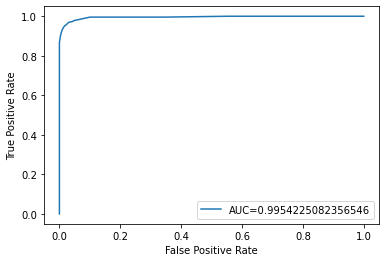

In [245]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [83]:
# Print ROC_AUC score using probabilities
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:, 1]))

AUC Score:
0.9931241860108788


An AUC score of 0.99 suggests that our Random Forest Model is almost perfect with 99% correct Predictions.